<a href="https://colab.research.google.com/github/yuna1998/statistic-class/blob/main/kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
##create data points

In [ ]:
df = pd.DataFrame(columns = ['x','y'])

In [ ]:
df.loc[0] = [3,1]
df.loc[1] = [4,1]
df.loc[3] = [3,2]
df.loc[4] = [4,2]
df.loc[5] = [10,6]
df.loc[6] = [11,5]
df.loc[7] = [11,6]
df.loc[8] = [15,1]
df.loc[9] = [15,2]
df.loc[10] = [16,1]
df.loc[11] = [16,2]

In [ ]:
df.head(20)

,x,y
0,3,1
1,4,1
3,3,2
4,4,2
5,10,6
6,11,5
7,11,6
8,15,1
9,15,2
10,16,1


In [ ]:
##Visualize data points on 2D plot

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(16.299999999999997, 0.5, 'y')

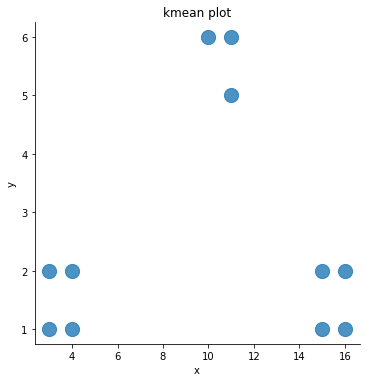

In [ ]:
sns.lmplot('x','y',data = df, fit_reg = False, scatter_kws = {'s' : 200})
plt.title('kmean plot')
plt.xlabel('x')
plt.ylabel('y')

In [ ]:
##k-mean clustering

In [ ]:
data_points = df.values

In [ ]:
kmeans = KMeans(n_clusters=3).fit(data_points)

In [ ]:
kmeans.labels_

array([1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[10.66666667,  5.66666667],
       [ 3.5       ,  1.5       ],
       [15.5       ,  1.5       ]])

In [ ]:
df['cluster_id'] = kmeans.labels_

In [ ]:
df.head(20)

,x,y,cluster_id
0,3,1,1
1,4,1,1
3,3,2,1
4,4,2,1
5,10,6,0
6,11,5,0
7,11,6,0
8,15,1,2
9,15,2,2
10,16,1,2


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'after kmean clustering')

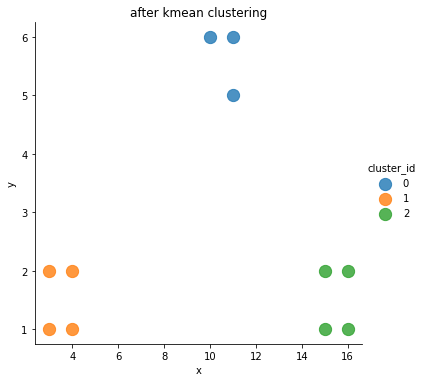

In [ ]:
sns.lmplot('x','y',data=df,fit_reg=False,
           scatter_kws={"s":150}, hue = 'cluster_id')
plt.title('after kmean clustering')

In [ ]:
#Titanic
#1. Defining the problm statement
#2. Collectring data


In [ ]:
## load train, test dataset using pandas

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
filename = '/content/drive/MyDrive/train.csv'

In [ ]:
train = pd.read_csv(filename)

In [ ]:
filename = '/content/drive/MyDrive/test.csv'

In [ ]:
test = pd.read_csv(filename)

In [ ]:
##3. Exploratory data analysis

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.shape

(891, 12)

In [ ]:
test.shape

(418, 11)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
##import python lib for visualization

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [ ]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar',stacked = True, figsize=(10,5))

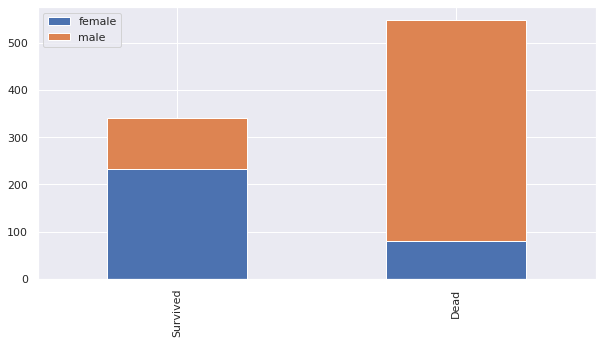

In [ ]:
bar_chart('Sex')

In [ ]:
## the chart confirms Women more likely survived than Man

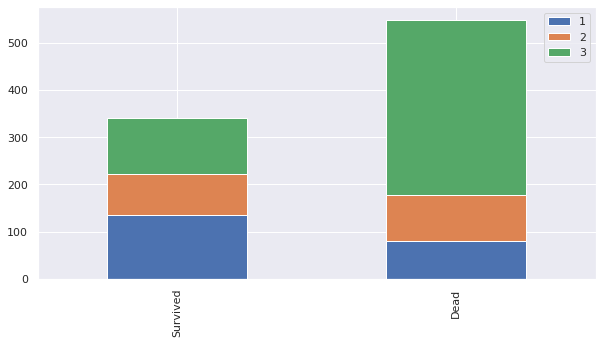

In [ ]:
bar_chart('Pclass')

In [ ]:
## The chart confirms 1st class more likely survived than other classed
## The chart confirms 3rd class more likely dead than other classes

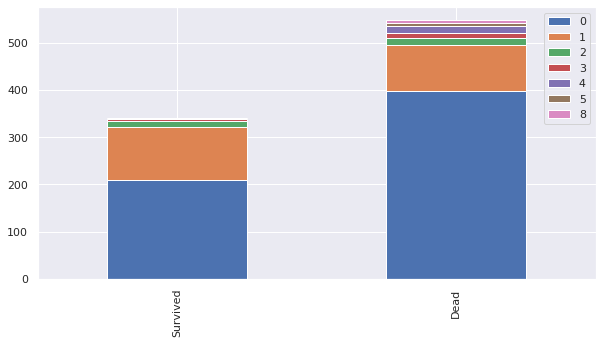

In [ ]:
bar_chart('SibSp')

In [ ]:
## The chart confirms a person aboarded with more than 2 siblings or spouse more likely surived
## The chart confirms a person aboarded without siblings or spouse more likely dead


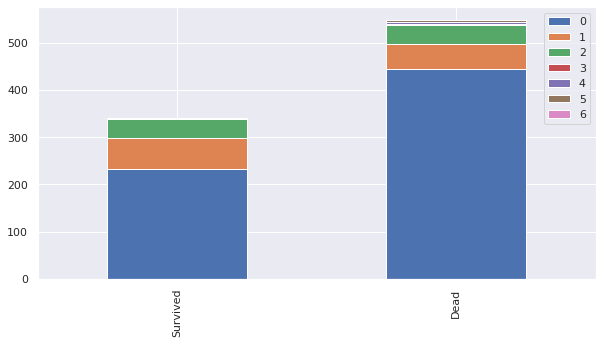

In [ ]:
bar_chart('Parch')

In [ ]:
##The chart confirms a person aboarded with more than 2 parents or childern more likely survived
## The chart confirms a person aboarded alone more likely dead

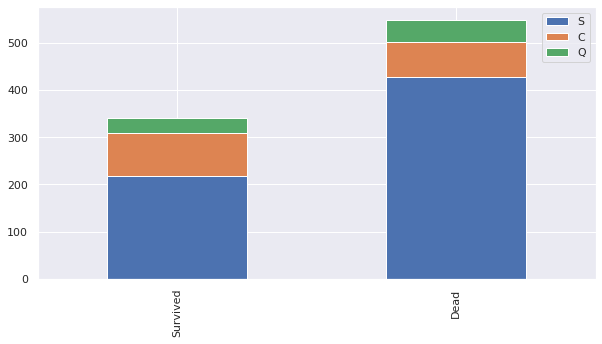

In [ ]:
bar_chart('Embarked')

In [ ]:
## the chart confirms a person aboarded from C slightly more likely survived
## the chart confirms a person aboarded from Q more likely dead
## the chart confimrs a person aboarded from S more likely dead

In [ ]:
##4. Feature engineering
## 데이터의 컬럼들 : 측량이 된 값들
## feature vector로 만들어 줘야 함 -> text를 숫자로 바꾸는 과정을 거쳐야..

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
##Name
train_test_data =  [train,test]

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)

In [ ]:
title_mapping = {"Mr":0, "Miss" : 1, "Mrs" : 2, "Master" : 3, "Dr" : 3, "Rev" : 3,
                 "Col" : 3, "Don" : 3, "Dona" : 3, "Mme" : 3, "Capt" : 3, "Sir" : 3}

for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


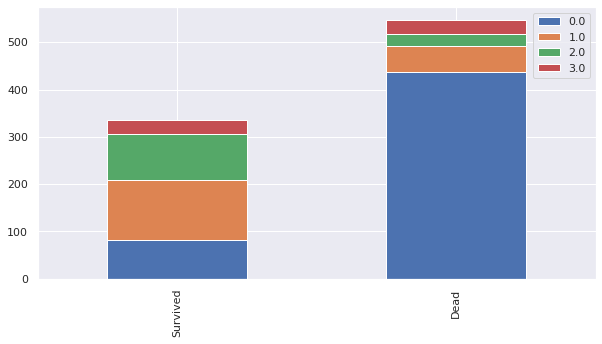

In [ ]:
bar_chart('Title')

In [ ]:
## delet unnecessary 

In [ ]:
sex_mapping = {"male" : 0, "female" : 1}

for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

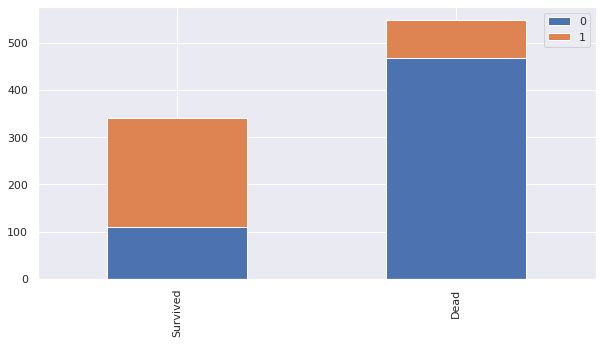

In [ ]:
bar_chart('Sex')

In [ ]:
##Age -> missing 있음

In [ ]:
## fill missing age with median age for each title (Mr, Miss, Others)

train['Age'].fillna(train.groupby('Title')['Age'].transform('median'),inplace = True)
train['Age'].fillna(test.groupby('Title')['Age'].transform('median'), inplace = True)

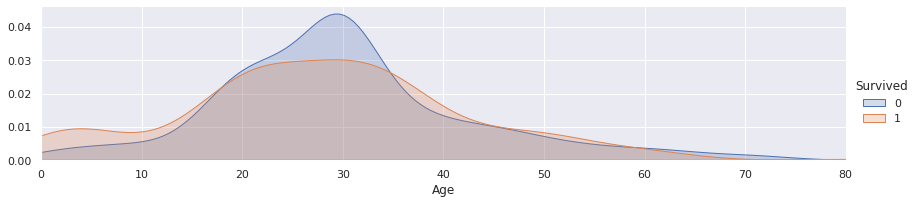

In [ ]:
facet = sns.FacetGrid(train, hue = "Survived", aspect = 4)
facet.map(sns.kdeplot, 'Age', shade = True)
facet.set(xlim = (0, train['Age'].max()))
facet.add_legend()

plt.show()

(0.0, 20.0)

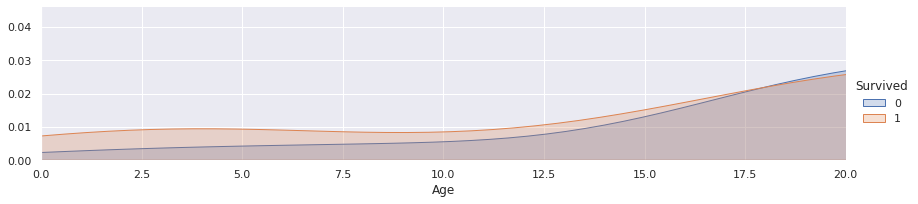

In [ ]:
facet = sns.FacetGrid(train, hue = "Survived", aspect = 4)
facet.map(sns.kdeplot, "Age", shade = True)
facet.set(xlim = (0, train['Age'].max()))
facet.add_legend()
plt.xlim(0,20)

(20.0, 30.0)

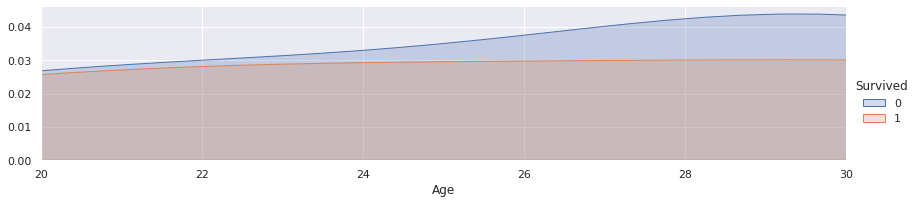

In [ ]:
facet = sns.FacetGrid(train, hue = "Survived", aspect = 4)
facet.map(sns.kdeplot, "Age", shade = True)
facet.set(xlim = (0, train['Age'].max()))
facet.add_legend()
plt.xlim(20,30)

In [ ]:
##Binning
#child : 0
#young :1
#adult :2
#mid-age :3
#senior :4


In [ ]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <=26), 'Age'] = 1,
    dataset.loc[ (dataset['Age'] > 26) & (dataset['Age'] <= 36),'Age'] = 2,
    dataset.loc[ (dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62,'Age'] = 4
                  

ValueError: ignored

In [ ]:
bar_chart('Age')

In [ ]:
##Embarked
##filling missing values

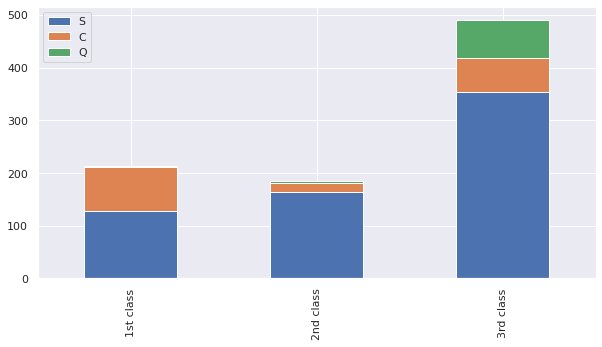

In [ ]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass'] ==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind = 'bar', stacked = True, figsize = (10,5))

In [ ]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0.0


In [ ]:
embarked_mapping = {"S" : 0, "C" :1, "Q" : 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [ ]:
##Fare

In [ ]:
train['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('median'), inplace = True)
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'), inplace = True)

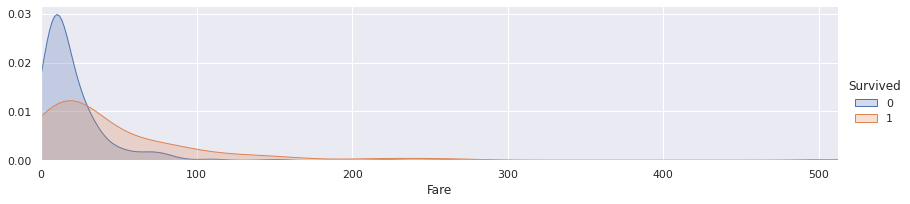

In [ ]:
facet = sns.FacetGrid(train, hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot, "Fare", shade = True)
facet.set(xlim = (0, train['Fare'].max()))
facet.add_legend()

plt.show()

(0.0, 20.0)

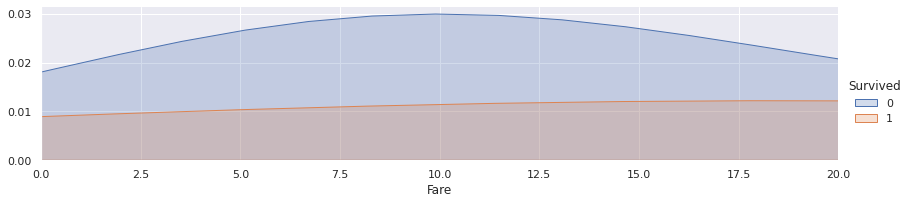

In [ ]:
facet = sns.FacetGrid(train, hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot, "Fare", shade = True)
facet.set(xlim = (0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0,20)

In [ ]:
for datset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[ (dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[ (dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare']>100, 'Fare'] = 3

ValueError: ignored